In [47]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [142]:
analysis = scripts.Analysis()

In [143]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'separate_g_groups',
                           'study__lblnew_g1_threshold',
                           'o3',
                           'band05_wn_980_1100',
                           'P_50_T_250',
                           '1.e-20_UseAbsmean')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [144]:
crdx = analysis.model('linear')
crdx.type_model = 'crd'
crdx.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'separate_g_groups',
                           'study__lblnew_g1_threshold',
                           'o3',
                           'band05_wn_980_1100',
                           'P_50_T_250',
                           '1.e-20_UseAbsmean')
crdx.fpath_flux = 'output_xfluxg.dat'
crdx.fpath_coolr = 'output_xcoolrg.dat'
crdx.linestyle = '-.'
crdx.load_data()

In [145]:
crdx_lg = analysis.model('log')
crdx_lg.type_model = 'crd'
crdx_lg.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'separate_g_groups',
                           'study__lblnew_g1_threshold',
                           'o3',
                           'band05_wn_980_1100',
                           'P_50_T_250',
                           '1.e-20_UseAbsmean_absmeanlog')
crdx_lg.fpath_flux = 'output_xfluxg.dat'
crdx_lg.fpath_coolr = 'output_xcoolrg.dat'
crdx_lg.linestyle = ':'
crdx_lg.load_data()

In [146]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               '1.e-20_UseAbsmean_wgts')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [147]:
fig = analysis.fig_fluxcoolr('fig1')
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [148]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [149]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [150]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [151]:
fig.display_hrefanchor()

In [152]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [153]:
table_dgdgs.display_hrefanchor()

In [154]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_hrefanchor(s)
display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

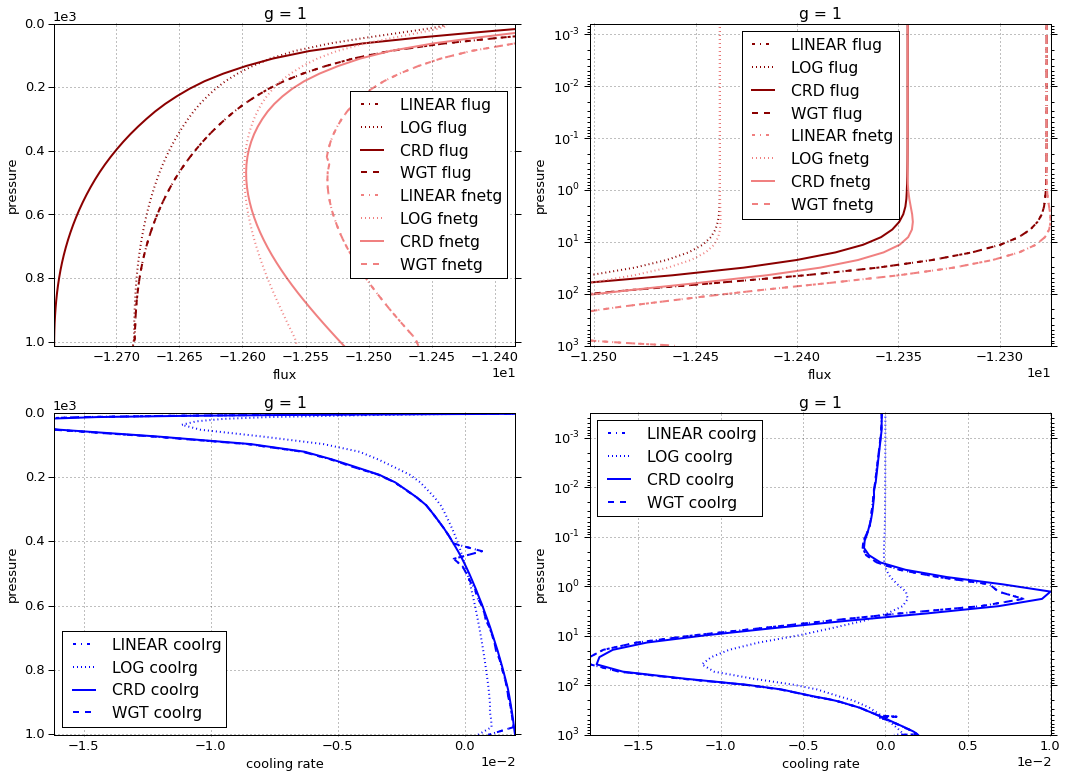

# Figure: flux, cooling rate. g-group 2

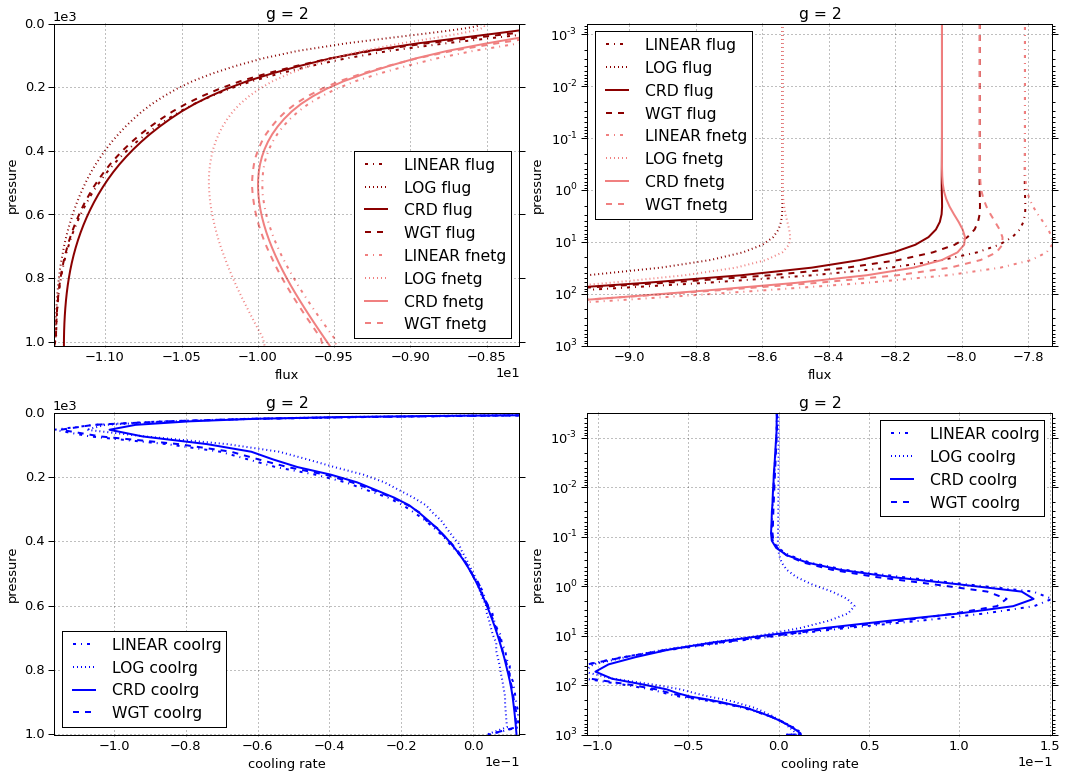

# Figure: flux, cooling rate. g-group 3

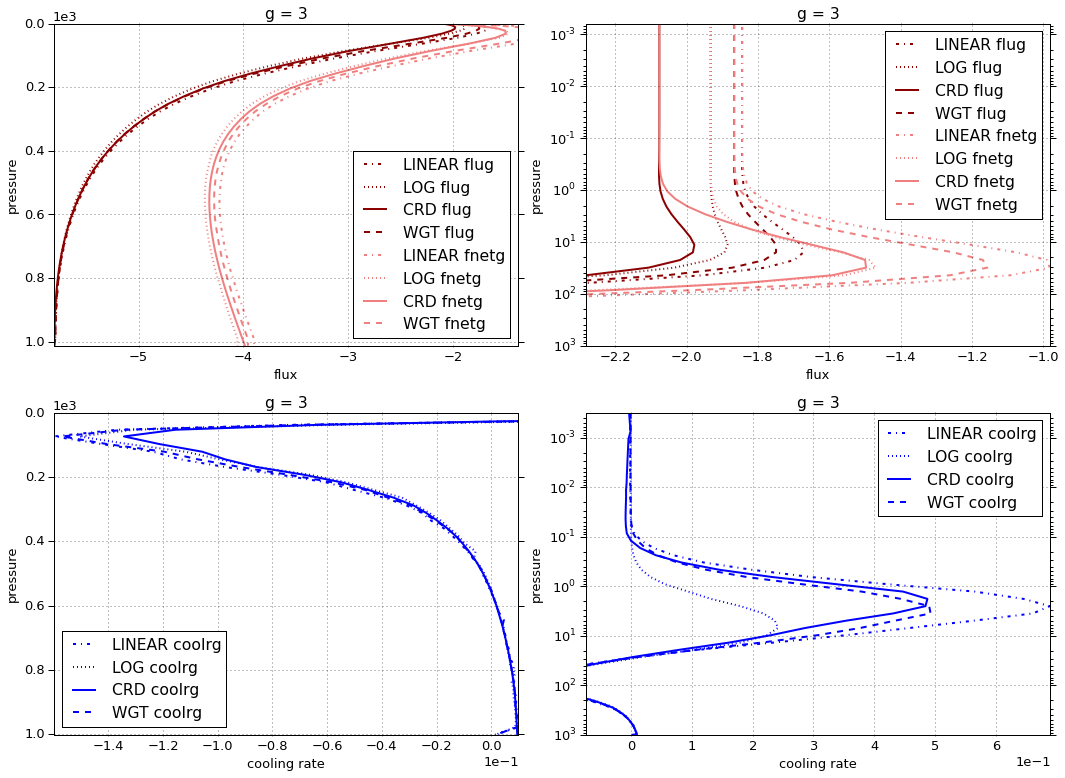

# Figure: flux, cooling rate. g-group 4

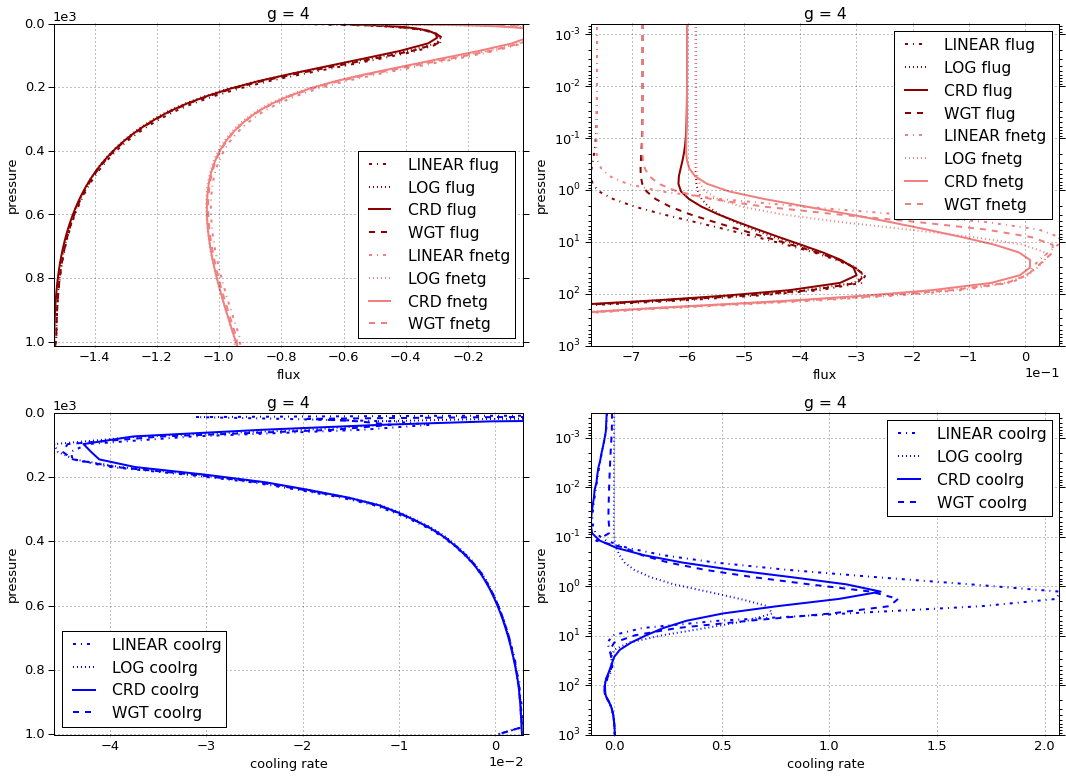

# Figure: flux, cooling rate. g-group total

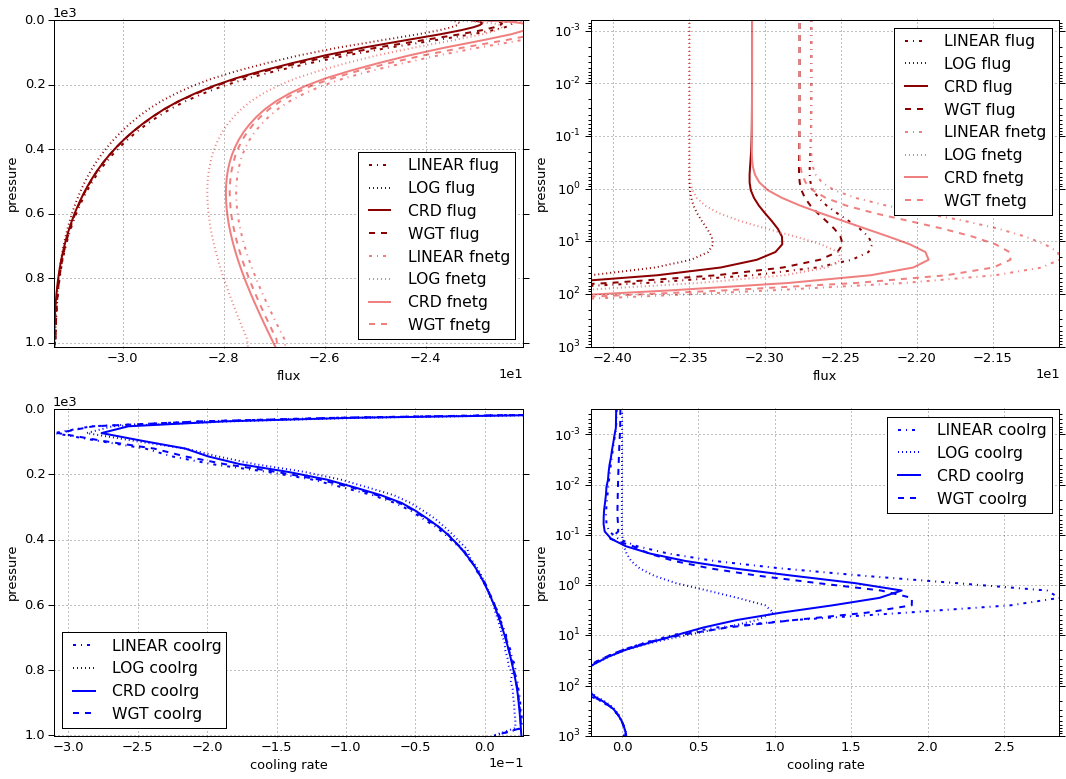

In [155]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [156]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.345441  0.000000 -12.345441
  1013     76    -12.749356  0.229847 -12.519509
2 0        1      -8.059874  0.000000  -8.059874
  1013     76    -11.270869  1.742516  -9.528353
3 0        1      -2.076206  0.000000  -2.076206
  1013     76     -5.804277  1.819821  -3.984456
4 0        1      -0.601468  0.000000  -0.601468
  1013     76     -1.529732  0.587698  -0.942034


LINEAR


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.276878  0.000000 -12.276878
  1013     76    -12.686847  0.226403 -12.460444
2 0        1      -7.810226  0.000000  -7.810226
  1013     76    -11.334790  1.848303  -9.486487
3 0        1      -1.844265  0.000000  -1.844265
  1013     76     -5.805977  1.909178  -3.896798
4 0        1      -0.761721  0.000000  -0.761721
  1013     76     -1.526621  0.594133  -0.932488


LOG


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.438069  0.000000 -12.438069
  1013     76    -12.686847  0.129943 -12.556904
2 0        1      -8.539821  0.000000  -8.539821
  1013     76    -11.334790  1.379288  -9.955502
3 0        1      -1.932477  0.000000  -1.932477
  1013     76     -5.805977  1.751367  -4.054609
4 0        1      -0.585945  0.000000  -0.585945
  1013     76     -1.526621  0.576569  -0.950052


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.276878  0.000000 -12.276878
  1013     76    -12.686847  0.226403 -12.460444
2 0        1      -7.946031  0.000000  -7.946031
  1013     76    -11.334790  1.759438  -9.575352
3 0        1      -1.866600  0.000000  -1.866600
  1013     76     -5.805977  1.850664  -3.955313
4 0        1      -0.680738  0.000000  -0.680738
  1013     76     -1.526621  0.583657  -0.942964


LINEAR - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.068563  0.000000  0.068563
  1013     76     0.062509 -0.003444  0.059065
2 0        1      0.249648  0.000000  0.249648
  1013     76    -0.063921  0.105788  0.041866
3 0        1      0.231942  0.000000  0.231942
  1013     76    -0.001699  0.089357  0.087657
4 0        1     -0.160254  0.000000 -0.160254
  1013     76     0.003111  0.006435  0.009546


LOG - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.092628  0.000000 -0.092628
  1013     76     0.062509 -0.099904 -0.037395
2 0        1     -0.479947  0.000000 -0.479947
  1013     76    -0.063921 -0.363228 -0.427149
3 0        1      0.143729  0.000000  0.143729
  1013     76    -0.001699 -0.068454 -0.070154
4 0        1      0.015522  0.000000  0.015522
  1013     76     0.003111 -0.011129 -0.008018


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.068563  0.000000  0.068563
  1013     76     0.062509 -0.003444  0.059065
2 0        1      0.113842  0.000000  0.113842
  1013     76    -0.063921  0.016923 -0.046999
3 0        1      0.209606  0.000000  0.209606
  1013     76    -0.001699  0.030842  0.029143
4 0        1     -0.079270  0.000000 -0.079270
  1013     76     0.003111 -0.004041 -0.000930

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000211
  1001.112500 75     0.001983
2 0.000312    1     -0.001052
  1001.112500 75     0.012158
3 0.000312    1     -0.002875
  1001.112500 75     0.009414
4 0.000312    1     -0.034461
  1001.112500 75     0.002803


LINEAR


coolrg
g pressure    layer          
1 0.000312    1     -0.000223
  1001.112500 75     0.000935
2 0.000312    1     -0.001012
  1001.112500 75     0.004264
3 0.000312    1     -0.000891
  1001.112500 75     0.001383
4 0.000312    1     -0.033443
  1001.112500 75     0.000120


LOG


coolrg
g pressure    layer              
1 0.000312    1     -5.539361e-07
  1001.112500 75     5.210127e-04
2 0.000312    1     -8.981185e-06
  1001.112500 75     3.643003e-03
3 0.000312    1     -1.834759e-06
  1001.112500 75     1.435779e-03
4 0.000312    1     -3.409547e-06
  1001.112500 75     1.694159e-04


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000223
  1001.112500 75     0.000935
2 0.000312    1     -0.000836
  1001.112500 75     0.004113
3 0.000312    1     -0.000482
  1001.112500 75     0.001454
4 0.000312    1     -0.009733
  1001.112500 75     0.000146


LINEAR - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000012
  1001.112500 75    -0.001048
2 0.000312    1      0.000040
  1001.112500 75    -0.007895
3 0.000312    1      0.001984
  1001.112500 75    -0.008032
4 0.000312    1      0.001018
  1001.112500 75    -0.002684


LOG - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000211
  1001.112500 75    -0.001462
2 0.000312    1      0.001043
  1001.112500 75    -0.008515
3 0.000312    1      0.002874
  1001.112500 75    -0.007978
4 0.000312    1      0.034458
  1001.112500 75    -0.002634


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000012
  1001.112500 75    -0.001048
2 0.000312    1      0.000215
  1001.112500 75    -0.008045
3 0.000312    1      0.002393
  1001.112500 75    -0.007960
4 0.000312    1      0.024728
  1001.112500 75    -0.002658

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.082988,0.000000,-23.082988
1013,76,-31.354235,4.379882,-26.974353



LINEAR


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.693090,0.000000,-22.693090
1013,76,-31.354235,4.578017,-26.776217



LOG


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.496313,0.000000,-23.496313
1013,76,-31.354235,3.837167,-27.517068



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.770247,0.000000,-22.770247
1013,76,-31.354235,4.420162,-26.934073



LINEAR - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,3.898983e-01,0.000000,0.389898
1013,76,-1.000000e-07,0.198135,0.198135



LOG - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-4.133242e-01,0.000000,-0.413324
1013,76,-1.000000e-07,-0.542715,-0.542715



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,3.127411e-01,0.00000,0.312741
1013,76,-1.000000e-07,0.04028,0.040280


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.038599
1001.112500,75,0.026359



LINEAR


,,coolrg
pressure,layer,
0.000312,1,-0.035570
1001.112500,75,0.006701



LOG


,,coolrg
pressure,layer,
0.000312,1,-0.000015
1001.112500,75,0.005769



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.011275
1001.112500,75,0.006648



LINEAR - CRD


,,coolrg
pressure,layer,
0.000312,1,0.003029
1001.112500,75,-0.019658



LOG - CRD


,,coolrg
pressure,layer,
0.000312,1,0.038585
1001.112500,75,-0.020590



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.027324
1001.112500,75,-0.019712


In [157]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.413000,0.404629
2,0.353833,0.361507
3,0.184333,0.185174
4,0.048833,0.048689


In [158]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=1).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

linear                                           log        \
                 g level       flug          fldg      fnetg   g level   
pressure                                                                 
0.000000         1     1 -12.276878  0.000000e+00 -12.276878   1     1   
0.000624         1     2 -12.276878  3.290256e-09 -12.276878   1     2   
0.000876         1     3 -12.276878  4.795585e-09 -12.276878   1     3   
0.001229         1     4 -12.276878  7.410043e-09 -12.276878   1     4   
0.001723         1     5 -12.276878  1.183359e-08 -12.276878   1     5   
0.002417         1     6 -12.276878  1.915042e-08 -12.276878   1     6   
0.003391         1     7 -12.276879  3.105169e-08 -12.276879   1     7   
0.004757         1     8 -12.276879  5.015181e-08 -12.276879   1     8   
0.006672         1     9 -12.276879  8.047458e-08 -12.276879   1     9   
0.009359         1    10 -12.276879  1.281922e-07 -12.276879   1    10   
0.013128         1    11 -12.276879  2.027320e-07 -12.276879   1    11   
0.018414         1    12 -12.276880  3.184709e-07 -12.276880   1    12   
0.025830         1    13 -12.276881  4.972276e-07 -12.276880   1    13   
0.036232         1    14 -12.276882  7.721685e-07 -12.276881   1    14   
0.050823         1    15 -12.276884  1.197047e-06 -12.276883   1    15   
0.071291         1    16 -12.276887  1.905654e-06 -12.276885   1    16   
0.100000         1    17 -12.276892  3.383917e-06 -12.276889   1    17   
0.140271         1    18 -12.276902  6.875323e-06 -12.276895   1    18   
0.196760         1    19 -12.276920  1.492776e-05 -12.276905   1    19   
0.275997         1    20 -12.276949  3.299463e-05 -12.276916   1    20   
0.387100         1    21 -12.276995  7.272262e-05 -12.276922   1    21   
0.543100         1    22 -12.277066  1.588136e-04 -12.276907   1    22   
0.761700         1    23 -12.277165  3.411384e-04 -12.276824   1    23   
1.068500         1    24 -12.277307  7.127263e-04 -12.276594   1    24   
1.498800         1    25 -12.277648  1.403877e-03 -12.276244   1    25   
2.102400         1    26 -12.278149  2.504646e-03 -12.275644   1    26   
2.949000         1    27 -12.279219  4.154385e-03 -12.275065   1    27   
4.136600         1    28 -12.281363  6.420790e-03 -12.274943   1    28   
5.802500         1    29 -12.284920  9.302488e-03 -12.275618   1    29   
8.139200         1    30 -12.290606  1.292368e-02 -12.277682   1    30   
...            ...   ...        ...           ...        ...  ..   ...   
323.524990       1    47 -12.619987  9.512009e-02 -12.524867   1    47   
347.299990       1    48 -12.626025  9.822103e-02 -12.527804   1    48   
371.075010       1    49 -12.631575  1.014583e-01 -12.530116   1    49   
394.850010       1    50 -12.636701  1.048372e-01 -12.531864   1    50   
418.625000       1    51 -12.641480  1.083809e-01 -12.533099   1    51   
442.399990       1    52 -12.645906  1.147290e-01 -12.531177   1    52   
466.174990       1    53 -12.649981  1.175838e-01 -12.532397   1    53   
489.950010       1    54 -12.653710  1.210863e-01 -12.532624   1    54   
513.724980       1    55 -12.657143  1.247376e-01 -12.532406   1    55   
537.500000       1    56 -12.660325  1.285495e-01 -12.531775   1    56   
561.275020       1    57 -12.663261  1.326580e-01 -12.530603   1    57   
585.049990       1    58 -12.665973  1.367240e-01 -12.529249   1    58   
608.825010       1    59 -12.668473  1.410758e-01 -12.527397   1    59   
632.599980       1    60 -12.670764  1.455310e-01 -12.525233   1    60   
656.375000       1    61 -12.672857  1.499576e-01 -12.522899   1    61   
680.150020       1    62 -12.674759  1.546285e-01 -12.520130   1    62   
703.924990       1    63 -12.676472  1.593888e-01 -12.517083   1    63   
727.700010       1    64 -12.678003  1.642363e-01 -12.513767   1    64   
751.474980       1    65 -12.679361  1.690690e-01 -12.510292   1    65   
775.250000       1    66 -12.680551  1.740938e-01 -12.506457   1    66   
799.025020      

In [159]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')